In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Wireshark display filter:

>((!arp) && (tcp.flags.syn == 1)) && (ip.src == 192.168.15.1)

## Load the CSV files into a DataFrames

In [3]:
ports_100_df=pd.read_csv('../CsvFiles/filtered_nmap -sS -v -F.csv')
ports_1000_df=pd.read_csv('../CsvFiles/filtered_nmap -sS -v.csv')
ports_5000_df=pd.read_csv('../CsvFiles/filtered_nmap -sS -v --top-ports 5000.csv')

In [4]:
# display dataframe to check data
ports_1000_df

,No.,Time,Source,Source Port,Destination,Destination Port,Protocol,Info,Length
0,1,0.000000,192.168.15.1,48888,192.168.15.155,1025,TCP,48888 > 1025 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
1,2,0.000113,192.168.15.1,48888,192.168.15.155,199,TCP,48888 > 199 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
2,3,0.000161,192.168.15.1,48888,192.168.15.155,110,TCP,48888 > 110 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
3,4,0.000220,192.168.15.1,48888,192.168.15.155,445,TCP,48888 > 445 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
4,5,0.000262,192.168.15.1,48888,192.168.15.155,135,TCP,48888 > 135 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
...,...,...,...,...,...,...,...,...,...
1056,2041,1.564142,192.168.15.1,48890,192.168.15.155,9594,TCP,48890 > 9594 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
1057,2042,1.564179,192.168.15.1,48890,192.168.15.155,7496,TCP,48890 > 7496 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
1058,2043,1.564210,192.168.15.1,48890,192.168.15.155,1999,TCP,48890 > 1999 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
1059,2044,1.564251,192.168.15.1,48888,192.168.15.155,99,TCP,48888 > 99 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58


## Remove duplicate rows based on Destination ports

In [5]:
clean_ports_100_df = ports_100_df.drop_duplicates(subset=['Destination Port'])
clean_ports_1000_df = ports_1000_df.drop_duplicates(subset=['Destination Port'])
clean_ports_5000_df = ports_5000_df.drop_duplicates(subset=['Destination Port'])

In [6]:
# display dataframe after filter it from duplicate rows based on destination port column
clean_ports_100_df

,No.,Time,Source,Source Port,Destination,Destination Port,Protocol,Info,Length
0,1,0.000000,192.168.15.1,40111,192.168.15.155,110,TCP,40111 > 110 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
1,2,0.000094,192.168.15.1,40111,192.168.15.155,1720,TCP,40111 > 1720 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
2,3,0.000132,192.168.15.1,40111,192.168.15.155,23,TCP,40111 > 23 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
3,4,0.000183,192.168.15.1,40111,192.168.15.155,554,TCP,40111 > 554 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
4,5,0.000234,192.168.15.1,40111,192.168.15.155,199,TCP,40111 > 199 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,58
...,...,...,...,...,...,...,...,...,...
95,175,0.004808,192.168.15.1,40111,192.168.15.155,10000,TCP,40111 > 10000 [SYN] Seq=0 Win=1024 Len=0 MSS...,58
96,176,0.004823,192.168.15.1,40111,192.168.15.155,8081,TCP,40111 > 8081 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58
97,178,0.004841,192.168.15.1,40111,192.168.15.155,49156,TCP,40111 > 49156 [SYN] Seq=0 Win=1024 Len=0 MSS...,58
98,179,0.004857,192.168.15.1,40111,192.168.15.155,1027,TCP,40111 > 1027 [SYN] Seq=0 Win=1024 Len=0 MSS=...,58


In [7]:
len(clean_ports_1000_df)

1000

## Graphs

### Prepare destination ports data

In [8]:
dp_ports_100_df= clean_ports_100_df['Destination Port']
dp_ports_1000_df= clean_ports_1000_df['Destination Port']
dp_ports_5000_df= clean_ports_5000_df['Destination Port']

In [9]:
dp_ports_5000_df

0          23
1         993
2        3306
3         199
4         143
        ...  
5439    20147
5440     3784
5441     1036
5442    60227
5443     2020
Name: Destination Port, Length: 5000, dtype: int64

In [10]:
dp_ports_1000_df

0       1025
1        199
2        110
3        445
4        135
        ... 
1035    6699
1036    1277
1037    8292
1059      99
1060    7402
Name: Destination Port, Length: 1000, dtype: int64

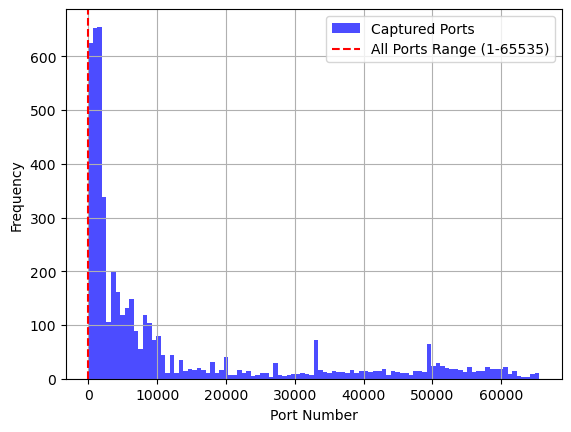

In [23]:
# create histogrm for most importnant 5000 ports in nmap
plt.hist(dp_ports_5000_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
plt.axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
plt.xlabel("Port Number")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('../../images/histogram of top 5000 ports in Nmap.png', dpi=600)
plt.show()

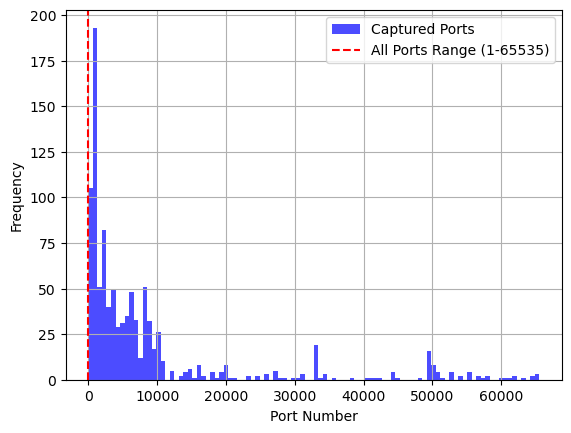

In [22]:
# create histogrm for most importnant 1000 ports in nmap
plt.hist(dp_ports_1000_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
plt.axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
plt.xlabel("Port Number")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('../../images/histogram of top 1000 ports in Nmap.png', dpi=600)
plt.show()

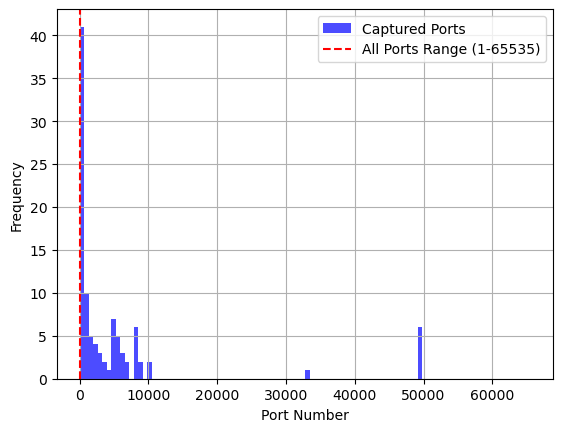

In [17]:
# create histogrm for most importnant 100 ports in nmap
plt.hist(dp_ports_100_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
plt.axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
plt.xlabel("Port Number")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('../../images/histogram of top 100 ports in Nmap.png', dpi=600)
plt.show()

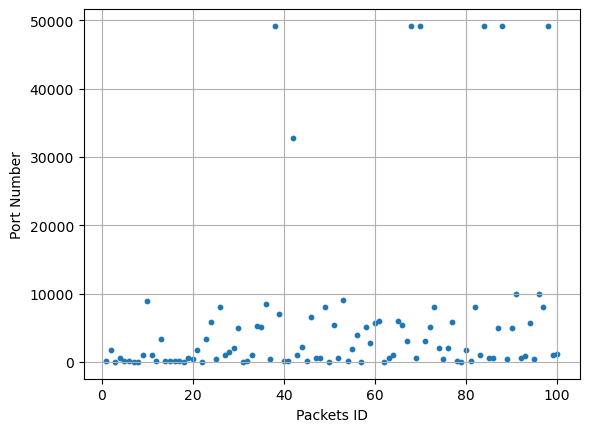

In [14]:
#Create a scatter plot for most importnant 100 ports in nmap
packets_id = list(range(1, len(dp_ports_100_df)+1))
plt.scatter(packets_id, dp_ports_100_df, marker='o', s=10)  # 'o' for circle marker, s for marker size
plt.xlabel("Packets ID")
plt.ylabel("Port Number")
plt.grid(True)
plt.savefig('../../images/most 100 ports distribution in Nmap.png', dpi=600)
plt.show()

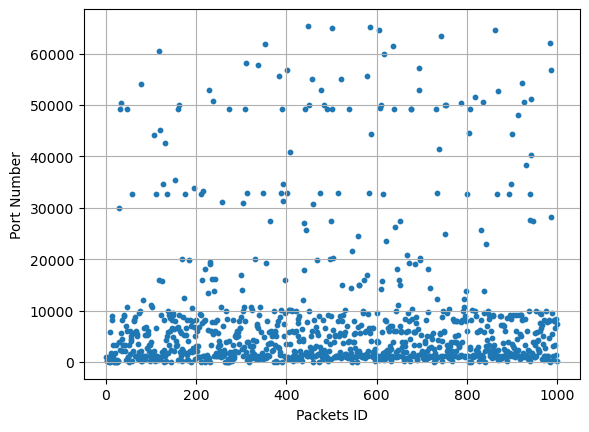

In [15]:
#Create a scatter plot for most importnant 1000 ports in nmap
packets_id = list(range(1, len(dp_ports_1000_df)+1))
plt.scatter(packets_id, dp_ports_1000_df, marker='o', s=10)  # 'o' for circle marker, s for marker size
plt.xlabel("Packets ID")
plt.ylabel("Port Number")
plt.savefig('../../images/most 1000 ports distribution in Nmap.png', dpi=600)
plt.grid(True)
plt.show()

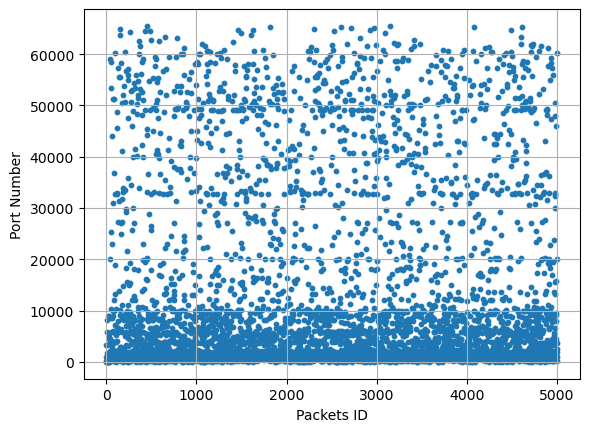

In [16]:
#Create a scatter plot for most importnant 5000 ports in nmap
packets_id = list(range(1, len(dp_ports_5000_df)+1))
plt.scatter(packets_id, dp_ports_5000_df, marker='o', s=10)  # 'o' for circle marker, s for marker size
plt.xlabel("Packets ID")
plt.ylabel("Port Number")
plt.savefig('../../images/most 5000 ports distribution in Nmap.png', dpi=600)
plt.grid(True)
plt.show()

# Source ports

In [25]:
# Read SYN scan data
ss_ports_100_df = pd.read_csv('../CsvFiles/filtered_nmap -sS -v -F.csv')
ss_ports_1000_df = pd.read_csv('../CsvFiles/filtered_nmap -sS -v.csv')
ss_ports_5000_df = pd.read_csv('../CsvFiles/filtered_nmap -sS -v --top-ports 5000.csv')

# Read Connect scan data
st_ports_100_df = pd.read_csv('../CsvFiles/filtered_nmap -sT -v -F.csv')
st_ports_1000_df = pd.read_csv('../CsvFiles/filtered_nmap -sT -v.csv')
st_ports_5000_df = pd.read_csv('../CsvFiles/filtered_nmap -sT -v --top-ports 5000.csv')

## Clean data from duplicate source ports

In [26]:
#-sC
clean_ss_ports_100_df = ss_ports_100_df.drop_duplicates(subset=['Source Port'])
clean_ss_ports_1000_df = ss_ports_1000_df.drop_duplicates(subset=['Source Port'])
clean_ss_ports_5000_df = ss_ports_5000_df.drop_duplicates(subset=['Source Port'])

In [27]:
#5000
print('*' * 20,'5000 ports', '*' * 20)
print(clean_ss_ports_5000_df['Source Port'].values)
print('Number of source ports is: ',len(clean_ss_ports_5000_df['Source Port']))

#1000
print('*' * 20,'1000 ports', '*' * 20)
print(clean_ss_ports_1000_df['Source Port'].values)
print('Number of source ports is: ',len(clean_ss_ports_1000_df['Source Port']))

#100
print('*' * 20,'100 ports', '*' * 20)
print(clean_ss_ports_100_df['Source Port'].values)
print('Number of source ports is: ',len(clean_ss_ports_100_df['Source Port']))

******************** 5000 ports ********************
[39787 39789]
Number of source ports is:  2
******************** 1000 ports ********************
[48888 48890]
Number of source ports is:  2
******************** 100 ports ********************
[40111]
Number of source ports is:  1


In [28]:
#-sT
clean_st_ports_100_df = st_ports_100_df.drop_duplicates(subset=['Source Port'])
clean_st_ports_1000_df = st_ports_1000_df.drop_duplicates(subset=['Source Port'])
clean_st_ports_5000_df = st_ports_5000_df.drop_duplicates(subset=['Source Port'])

In [29]:
#5000
print('*' * 20,'5000 ports', '*' * 20)
print(clean_st_ports_5000_df['Source Port'].values)
print('Number of source ports is: ',len(clean_st_ports_5000_df['Source Port']))

#1000
print('*' * 20,'1000 ports', '*' * 20)
print(clean_st_ports_1000_df['Source Port'].values)
print('Number of source ports is: ',len(clean_st_ports_1000_df['Source Port']))

#100
print('*' * 20,'100 ports', '*' * 20)
print(clean_st_ports_100_df['Source Port'].values)
print('Number of source ports is: ',len(clean_st_ports_100_df['Source Port']))

******************** 5000 ports ********************
[21686 21687 21688 ... 37134 37135 37136]
Number of source ports is:  15229
******************** 1000 ports ********************
[19652 19653 19654 ... 21669 21670 21671]
Number of source ports is:  2020
******************** 100 ports ********************
[18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458 18459
 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470 18471
 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482 18483
 18484 18485 18486 18487 18488 18489 18490 18491 18492 18493 18494 18495
 18496 18497 18498 18499 18500 18501 18502 18503 18504 18505 18506 18507
 18508 18509 18510 18511 18512 18513 18514 18515 18516 18517 18518 18519
 18520 18521 18522 18523 18524 18525 18526 18527 18528 18529 18530 18531
 18532 18533 18534 18535 18536 18537 18538 18539 18540 18541 18542 18543
 18544 18545 18546 18547 18548 18549 18550 18551 18552 18553 18554 18555
 18556 18557 18558 18559 18560 185

# Summary

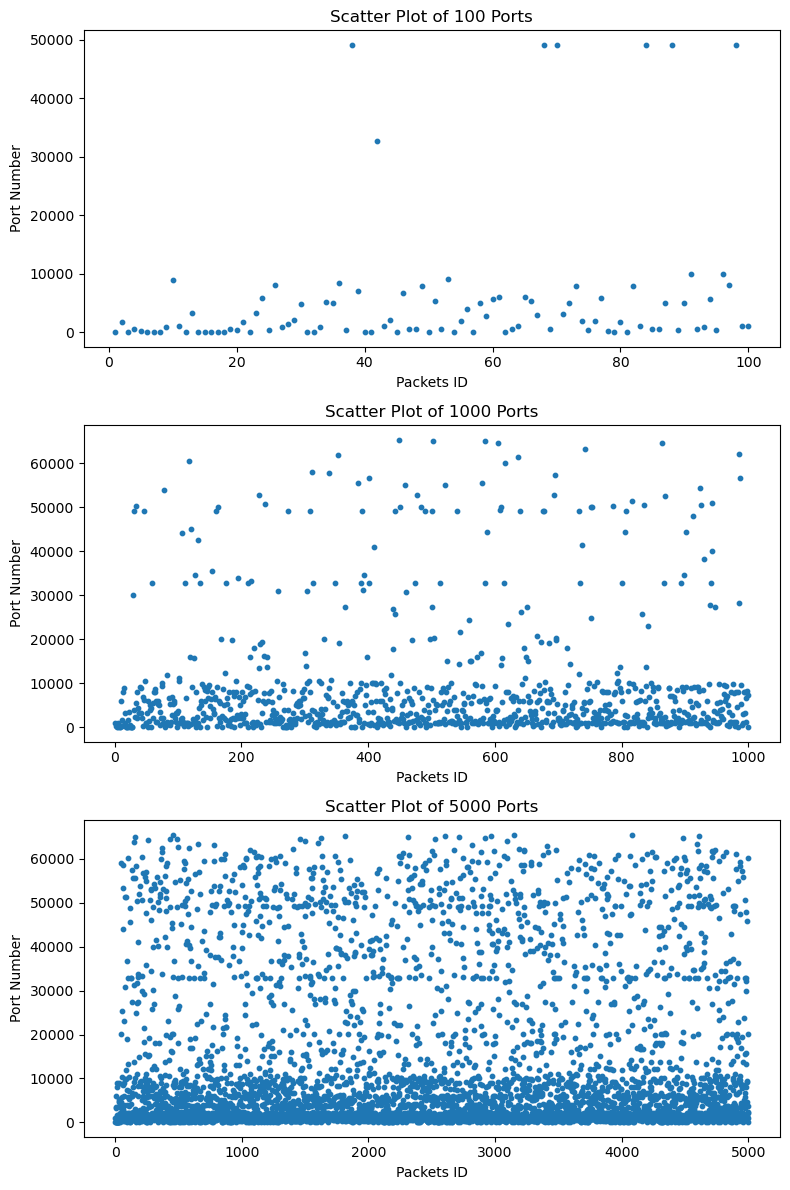

In [30]:
# Create a figure and a grid of subplots for Scatter figures
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Scatter plot for the most important 100 ports
packets_id = list(range(1, len(dp_ports_100_df) + 1))
axs[0].scatter(packets_id, dp_ports_100_df, marker='o', s=10)
axs[0].set_xlabel("Packets ID")
axs[0].set_ylabel("Port Number")
axs[0].set_title("Scatter Plot of 100 Ports")

# Scatter plot for the most important 1000 ports
packets_id = list(range(1, len(dp_ports_1000_df) + 1))
axs[1].scatter(packets_id, dp_ports_1000_df, marker='o', s=10)
axs[1].set_xlabel("Packets ID")
axs[1].set_ylabel("Port Number")
axs[1].set_title("Scatter Plot of 1000 Ports")

# Scatter plot for the most important 5000 ports
packets_id = list(range(1, len(dp_ports_5000_df) + 1))
axs[2].scatter(packets_id, dp_ports_5000_df, marker='o', s=10)
axs[2].set_xlabel("Packets ID")
axs[2].set_ylabel("Port Number")
axs[2].set_title("Scatter Plot of 5000 Ports")

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('../../images/ports scatter.png', dpi=600)
# Show the figure
plt.show()

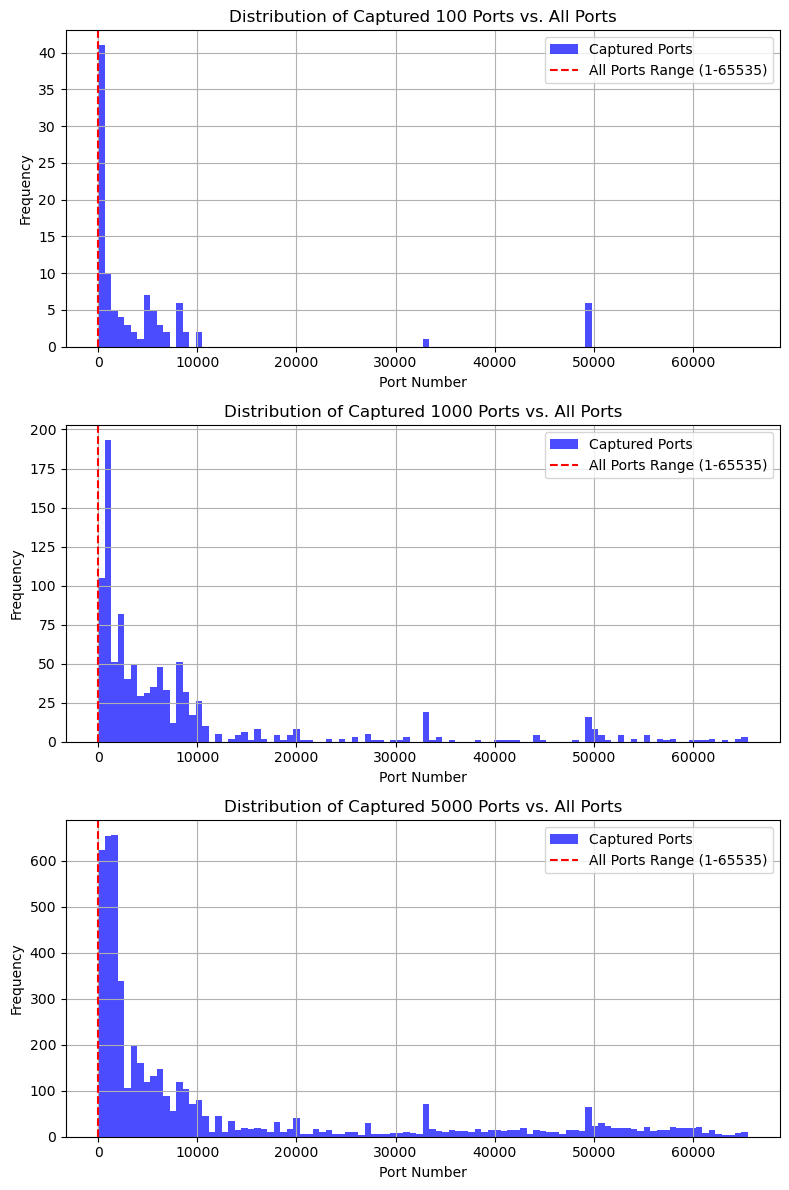

In [31]:
# Create a figure and a grid of subplots for histogram
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histogram for the most important 100 ports
axs[0].hist(dp_ports_100_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
axs[0].axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
axs[0].set_xlabel("Port Number")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of Captured 100 Ports vs. All Ports")
axs[0].legend()
axs[0].grid(True)

# Histogram for the most important 1000 ports
axs[1].hist(dp_ports_1000_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
axs[1].axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
axs[1].set_xlabel("Port Number")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Captured 1000 Ports vs. All Ports")
axs[1].legend()
axs[1].grid(True)

# Histogram for the most important 5000 ports
axs[2].hist(dp_ports_5000_df, bins=100, range=(1, 65535), alpha=0.7, color='blue', label='Captured Ports')
axs[2].axvline(x=1, color='red', linestyle='--', label='All Ports Range (1-65535)')
axs[2].set_xlabel("Port Number")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Captured 5000 Ports vs. All Ports")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
# Adjust layout for better spacing with increased vertical space
# plt.subplots_adjust(hspace=0.5)

plt.savefig('../../images/ports histogram.png', dpi=600)

# Show the figure
plt.show()

# Metasploit vs Nmap

In [32]:
# Read
metasploit_1000_ports=pd.read_csv('../CsvFiles/auxiliary-scanner-portscan-syn.csv') 
nmap_1000_ports = pd.read_csv('../CsvFiles/filtered_nmap -sS -v -p1-1000.csv')

In [33]:
#Filter
dp_ports_100_df= clean_ports_100_df['Destination Port']
clean_metasploit_1000_ports = metasploit_1000_ports.drop_duplicates(subset=['Destination Port'])
clean_nmap_1000_ports = nmap_1000_ports.drop_duplicates(subset=['Destination Port'])

dp_metasploit_1000_ports = clean_metasploit_1000_ports['Destination Port']
dp_nmap_1000_ports = clean_nmap_1000_ports['Destination Port']

In [34]:
dp_metasploit_1000_ports

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: Destination Port, Length: 1000, dtype: int64

In [35]:
dp_nmap_1000_ports

0        23
1       135
2        22
3        80
4       445
       ... 
1078    345
1079    179
1080    840
1081     73
1082     82
Name: Destination Port, Length: 1000, dtype: int64

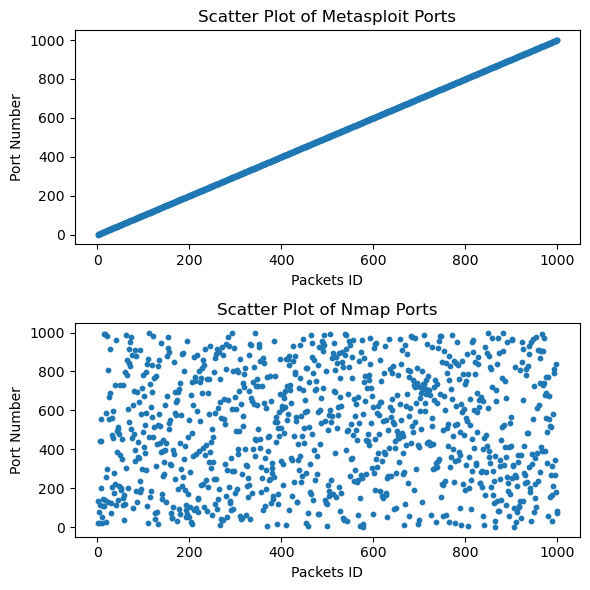

In [41]:
# Create a figure and a grid of subplots for Metasploit vs nmap figures
fig, axs = plt.subplots(2, 1, figsize=(6, 6))


# Scatter plot for Metasploit
packets_id = list(range(1, len(dp_metasploit_1000_ports) + 1))
axs[0].scatter(packets_id, dp_metasploit_1000_ports, marker='o', s=10)
axs[0].set_xlabel("Packets ID")
axs[0].set_ylabel("Port Number")
axs[0].set_title("Scatter Plot of Metasploit Ports")

# Scatter plot for Nmap
packets_id = list(range(1, len(dp_nmap_1000_ports) + 1))
axs[1].scatter(packets_id, dp_nmap_1000_ports, marker='o', s=10)
axs[1].set_xlabel("Packets ID")
axs[1].set_ylabel("Port Number")
axs[1].set_title("Scatter Plot of Nmap Ports")

plt.tight_layout()

plt.savefig('../../images/metasploit.png', dpi=600)

# Show the figure
plt.show()